In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# 1. Chargement des données
iris = load_iris()
X = iris.data
y = iris.target

# Convertir en DataFrame pour analyse
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Afficher les premières lignes
display(df.head())

# Analyse des statistiques descriptives
display(df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


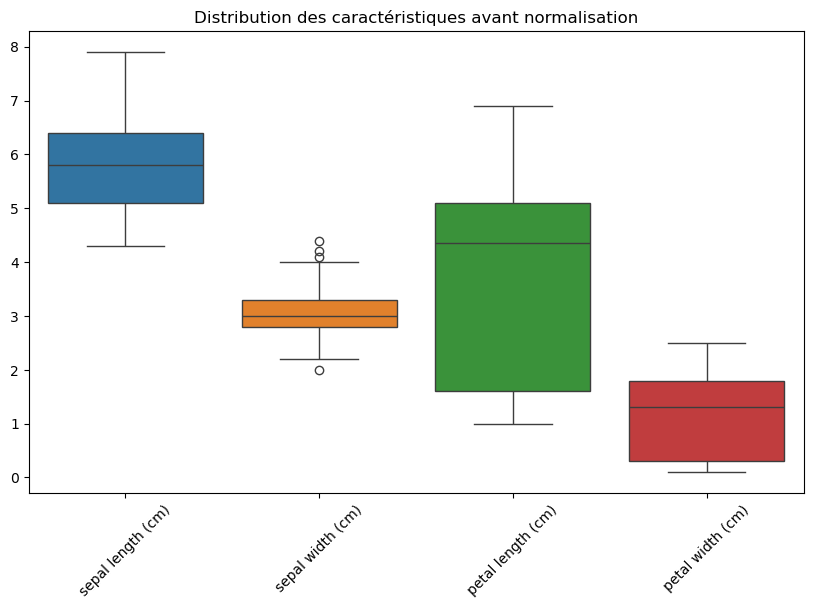

In [17]:
# Ajout des noms de classes
class_names = iris.target_names
df['target_name'] = df['species'].apply(lambda x: class_names[x])

# Distribution des classes avant normalisation
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(columns=['species', 'target_name']))
plt.xticks(rotation=45)
plt.title("Distribution des caractéristiques avant normalisation")
plt.show()

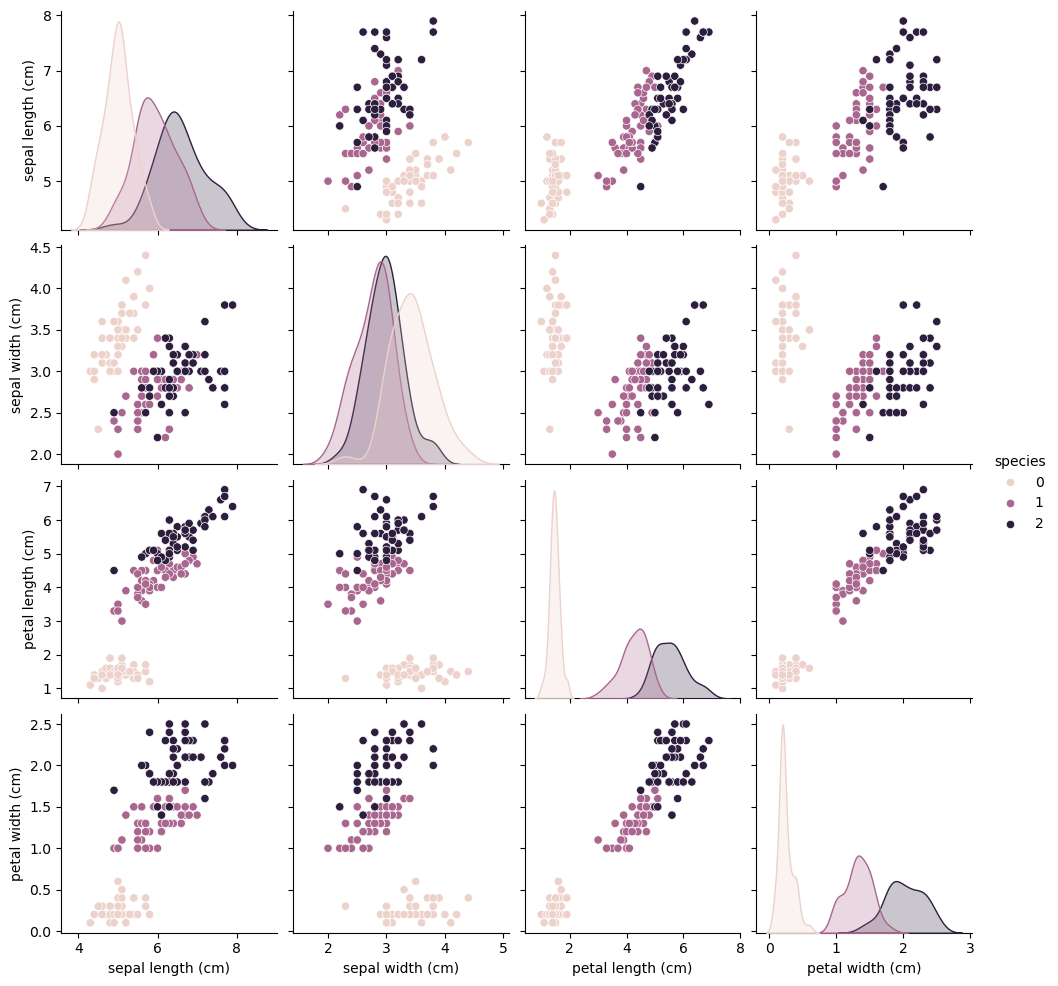

In [18]:
# Visualisation de la distribution des caractéristiques
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

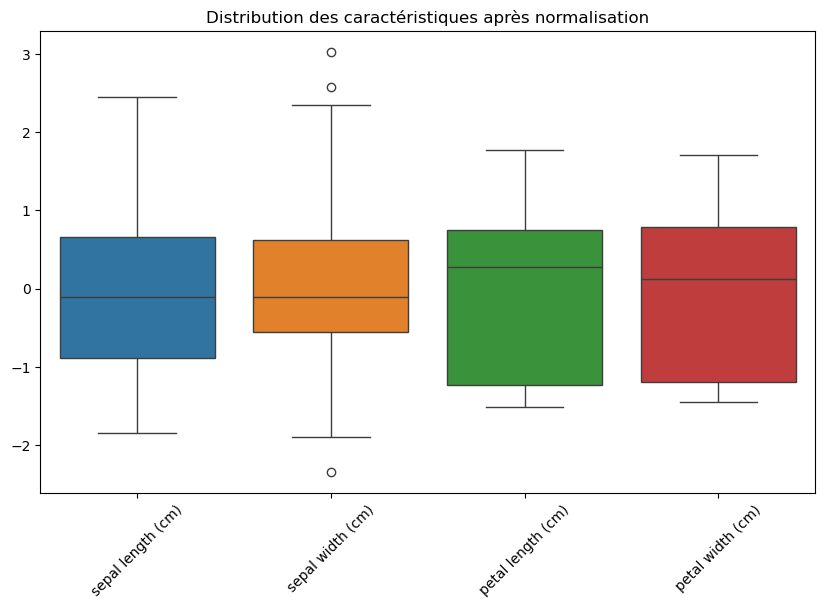

In [19]:
# 2. Prétraitement des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vérification de la distribution après normalisation
plt.figure(figsize=(10,6))
sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=iris.feature_names))
plt.xticks(rotation=45)
plt.title("Distribution des caractéristiques après normalisation")
plt.show()

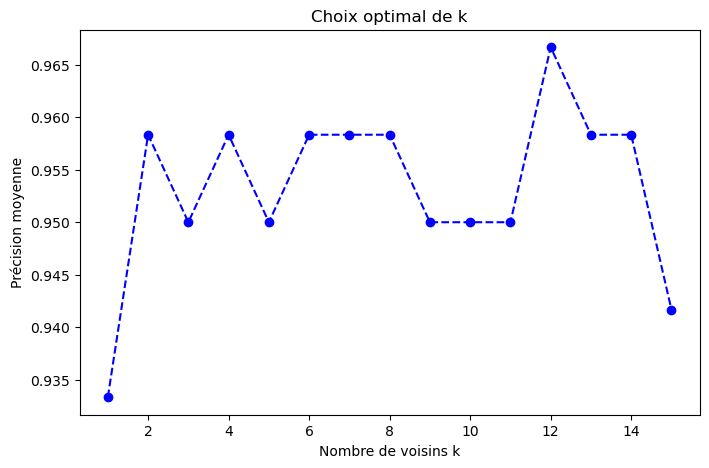

Meilleur k sélectionné: 12


In [20]:
# 3. Construction du modèle KNN
k_range = range(1, 16)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Tracer la courbe d'erreur
plt.figure(figsize=(8,5))
plt.plot(k_range, k_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel("Nombre de voisins k")
plt.ylabel("Précision moyenne")
plt.title("Choix optimal de k")
plt.show()

# Sélection du meilleur k
best_k = k_range[np.argmax(k_scores)]
print(f"Meilleur k sélectionné: {best_k}")

Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



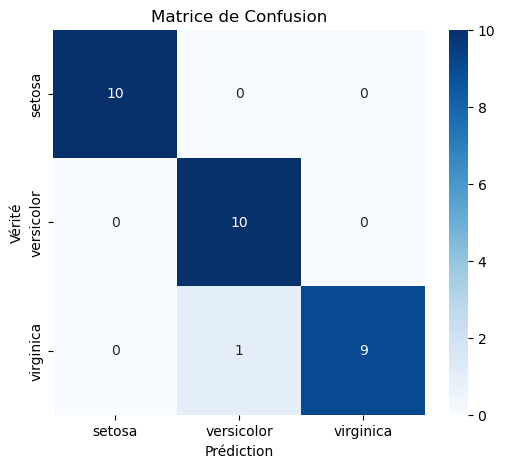

In [21]:
# 4. Évaluation du modèle
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred = knn_best.predict(X_test_scaled)

# Affichage des métriques de performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.title("Matrice de Confusion")
plt.show()

In [22]:
# 5. Utilisation du modèle pour des prédictions
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    sample = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    sample_scaled = scaler.transform(sample)
    prediction = knn_best.predict(sample_scaled)
    return iris.target_names[prediction[0]]

In [23]:
# Prédiction (renseigner par les valeurs désirées)
test_result = predict_iris(5.1, 3.5, 1.4, 0.2)
print(f"Prédiction pour les dimensions données: {test_result}")

Prédiction pour les dimensions données: setosa
